In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.models import Sequential

In [2]:
train_dir = 'Emotion2/train'
valid_dir = 'Emotion2/test'

In [12]:
train_gen = keras.preprocessing.image.ImageDataGenerator(rescale=1./255, horizontal_flip=True, vertical_flip=True, rotation_range=0.2, zoom_range=0.2, shear_range=0.2)
valid_gen = keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

train_data = train_gen.flow_from_directory(train_dir, target_size=(150, 150), batch_size=32, class_mode='categorical')
valid_data = valid_gen.flow_from_directory(valid_dir, target_size=(150, 150), batch_size=32, class_mode='categorical')

Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


## Exploratory Data Analysis (EDA)

In [13]:
class_name = list(train_data.class_indices.keys())
class_name

['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']

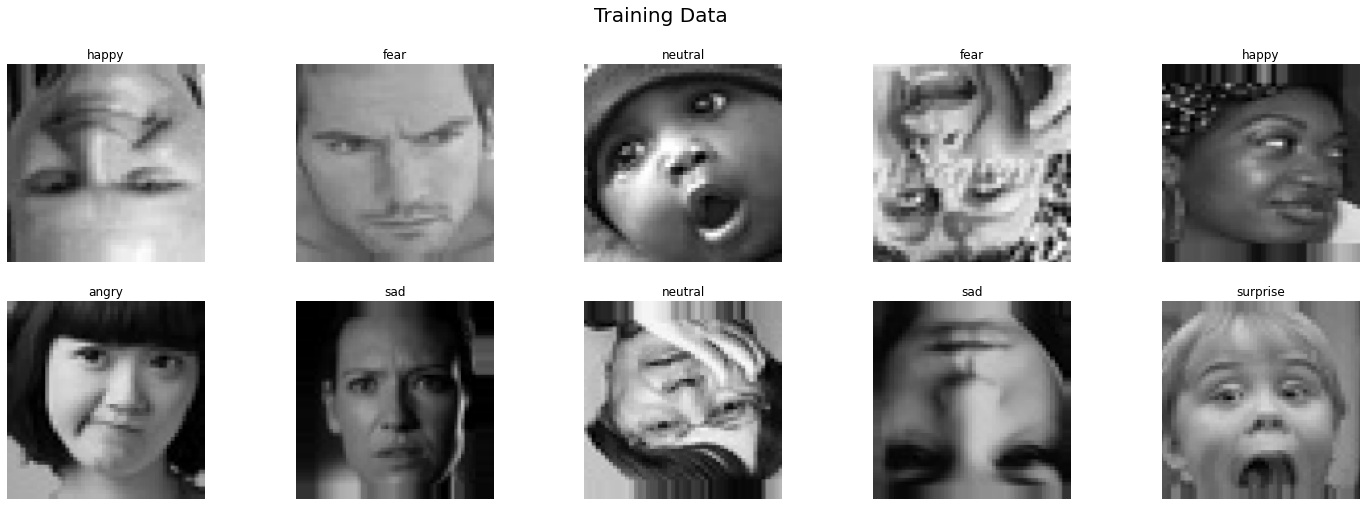

In [14]:
plt.figure(figsize=(25, 8))
plt.suptitle('Training Data', fontsize=20)
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(train_data[i][0][0])
    plt.title(class_name[np.argmax(train_data[i][1][0])])
    plt.axis('off')
plt.show()

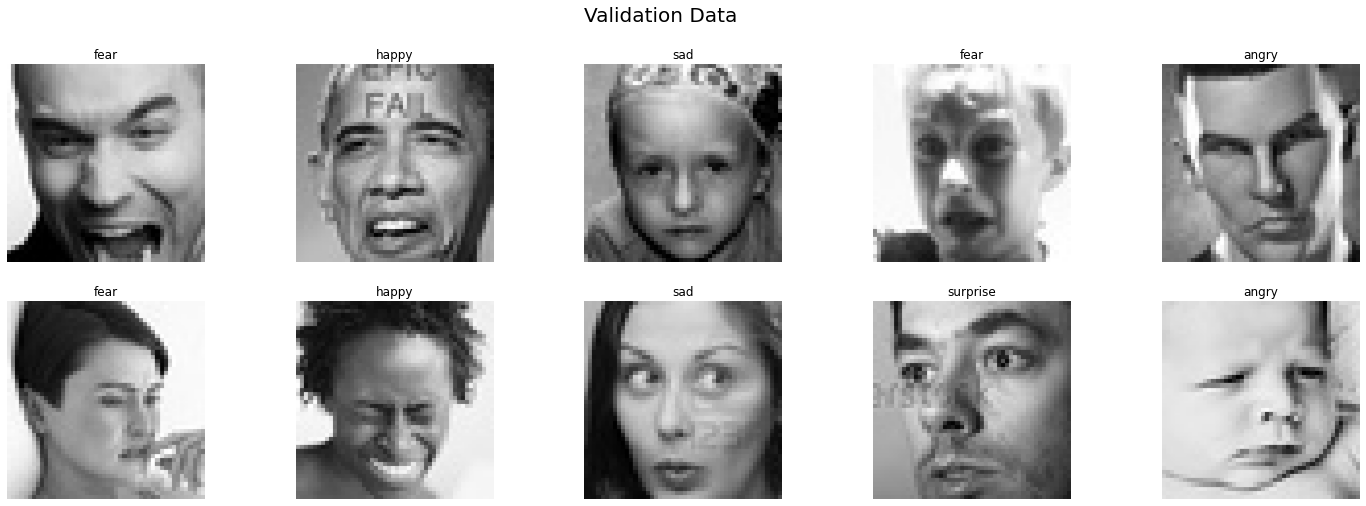

In [15]:
plt.figure(figsize=(25, 8))
plt.suptitle('Validation Data', fontsize=20)
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(valid_data[i][0][0])
    plt.title(class_name[np.argmax(valid_data[i][1][0])])
    plt.axis('off')
plt.show()

In [16]:
train_data[0][0][0].shape

(150, 150, 3)

## Modeling

In [17]:
callback = [keras.callbacks.EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True), keras.callbacks.ModelCheckpoint('Emotion2_model.h5', monitor='val_loss', save_best_only=True)]

In [26]:
mobilenet = tf.keras.applications.MobileNetV2(include_top=False, weights='imagenet', input_shape=(150, 150, 3), pooling='avg')
mobilenet.trainable = False

model = Sequential()

model.add(mobilenet)

model.add(Flatten())

# Fully connected layer
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))

# Fully connected layer
model.add(Dense(128, activation='relu'))

# Output Layer
model.add(Dense(7, activation='softmax'))

model.compile(optimizer='adamax', loss='categorical_crossentropy', metrics=['accuracy'])

In [27]:
history = model.fit(train_data, validation_data=valid_data, epochs=30, callbacks=callback)

Epoch 1/30
898/898 [==============================] - 141s 155ms/step - loss: 1.6973 - accuracy: 0.3312 - val_loss: 1.5521 - val_accuracy: 0.4124
Epoch 2/30
898/898 [==============================] - 133s 148ms/step - loss: 1.5989 - accuracy: 0.3764 - val_loss: 1.5412 - val_accuracy: 0.4078
Epoch 3/30
898/898 [==============================] - 131s 145ms/step - loss: 1.5727 - accuracy: 0.3911 - val_loss: 1.5012 - val_accuracy: 0.4294
Epoch 4/30
898/898 [==============================] - 132s 147ms/step - loss: 1.5470 - accuracy: 0.3997 - val_loss: 1.4806 - val_accuracy: 0.4369
Epoch 5/30
898/898 [==============================] - 137s 152ms/step - loss: 1.5310 - accuracy: 0.4083 - val_loss: 1.5215 - val_accuracy: 0.4079
Epoch 6/30
898/898 [==============================] - 126s 140ms/step - loss: 1.5155 - accuracy: 0.4167 - val_loss: 1.4869 - val_accuracy: 0.4315
Epoch 7/30
898/898 [==============================] - 125s 139ms/step - loss: 1.5072 - accuracy: 0.4214 - val_loss: 1.4542 -

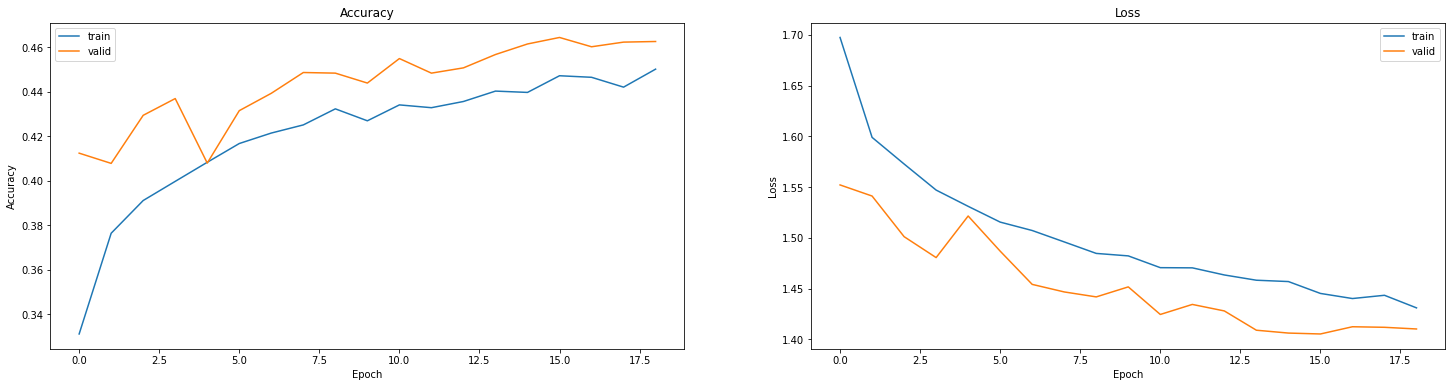

In [28]:
metrics = pd.DataFrame(history.history)

plt.figure(figsize=(25, 6))
plt.subplot(1, 2, 1)
plt.plot(metrics['accuracy'])
plt.plot(metrics['val_accuracy'])
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['train', 'valid'])
plt.subplot(1, 2, 2)
plt.plot(metrics['loss'])
plt.plot(metrics['val_loss'])
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['train', 'valid'])
plt.show()

In [29]:
img1 = tf.keras.preprocessing.image.load_img('PrivateTest_95094.jpg', target_size=(150, 150))
img1 = tf.keras.preprocessing.image.img_to_array(img1) / 255.
img1_pred = np.expand_dims(img1, axis=0)
img1_pred = model.predict(img1_pred)

img2 = tf.keras.preprocessing.image.load_img('PrivateTest_731447.jpg', target_size=(150, 150))
img2 = tf.keras.preprocessing.image.img_to_array(img2) / 255.
img2_pred = np.expand_dims(img2, axis=0)
img2_pred = model.predict(img2_pred)

img3 = tf.keras.preprocessing.image.load_img('PrivateTest_2017514.jpg', target_size=(150, 150))
img3 = tf.keras.preprocessing.image.img_to_array(img3) / 255.
img3_pred = np.expand_dims(img3, axis=0)
img3_pred = model.predict(img3_pred)

(-0.5, 149.5, 149.5, -0.5)

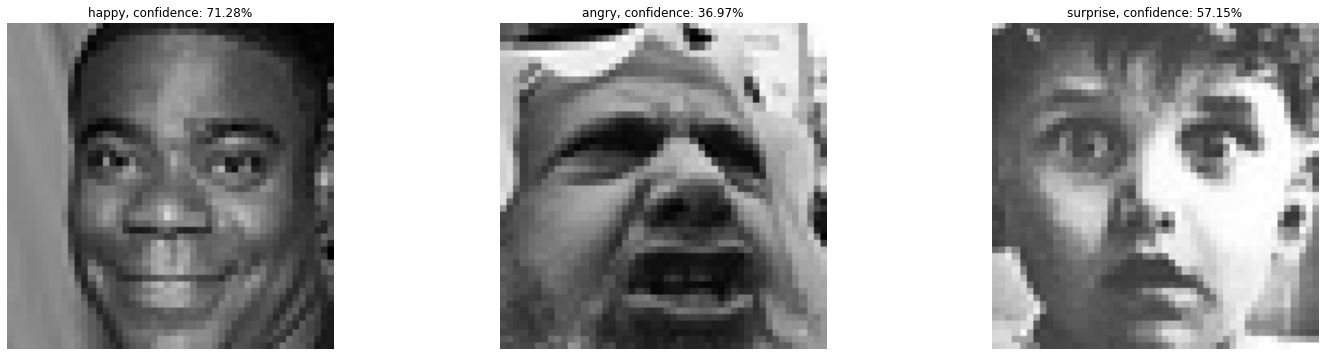

In [30]:
plt.figure(figsize=(25, 6))
plt.subplot(1, 3, 1)
plt.imshow(img1, cmap='gray')
plt.title(f"{class_name[np.argmax(img1_pred)]}, confidence: {(img1_pred[0][np.argmax(img1_pred)]) * 100:.2f}%")
plt.axis('off')
plt.subplot(1, 3, 2)
plt.imshow(img2, cmap='gray')
plt.title(f"{class_name[np.argmax(img2_pred)]}, confidence: {(img2_pred[0][np.argmax(img2_pred)]) * 100:.2f}%")
plt.axis('off')
plt.subplot(1, 3, 3)
plt.imshow(img3, cmap='gray')
plt.title(f"{class_name[np.argmax(img3_pred)]}, confidence: {(img3_pred[0][np.argmax(img3_pred)]) * 100:.2f}%")
plt.axis('off')